In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns = ["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


preco: preço desejado de venda;

vendido: se foi vendido ou não (0 ou 1);

idade_do_modelo: indica de quantos anos atrás é esse carro;

km_por_ano: Mostra a média de quilometragem que esse carro andou por ano.

vendido é uma categoria, a classificação que vamos utilizar são das classe 0 e 1. preco, idade_do_modeloe km_por_ano são as variáveis que temos de features para analisar.


In [2]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]


Sendo x o que queremos analisar, e y a nossa classificação. Também vamos separar "treino" e "teste", usando o SKLearn. Vamos separar 75% para treino e 25% pra teste.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 158020
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25, stratify= y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


Código acima realiza um teste em todos o elementos e realiza um teste com acada um deles


In [4]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(train_x, train_y)
acuracia = dummy_stratified.score(test_x, test_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 50.96%


In [5]:
from sklearn.tree import DecisionTreeClassifier

SEED = 158020
np.random.seed(SEED)
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print ("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 71.92%


Aproximadamente 72%


Entretanto, reparem que o código tem um SEED de 158020, que é um número qualquer escolhido aleatoriamente, para que pudéssemos rodar várias vezes, obtendo o mesmo resultado

In [6]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 158020
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25, stratify= y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print ("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 71.92%


In [7]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25, stratify= y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print ("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


Ao analisar os dois percebe que a SEED influencia no resultado.

OBS: A acurácia sobe para 76.84%, quase 77%. Então, aquela decisão de julgar isso como bom ou ruim em comparação ao que obtínhamos com Dummy Classifier está melhor, entretanto, ainda estamos vulneráveis a tomar uma decisão baseada em uma aleatoriedade. Não faz sentido validar, julgar se é bom ou ruim, de acordo com um número aleatório. Queremos minimizar o efeito dessa aleatoriedade, dessa escolha aleatória do treino, do teste e da DecisionTreeClassifier, na nossa decisão.

In [8]:
from sklearn.model_selection import cross_validate

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=3, return_train_score=False)
results

{'fit_time': array([0.00600052, 0.00599885, 0.00599861]),
 'score_time': array([0.00199986, 0.00100136, 0.00200295]),
 'test_score': array([0.75704859, 0.7629763 , 0.75337534])}

tempo de execução (fit_time);

tempo para nota (score_time);

resultados de teste (test_score);

resultados de treino (train_score).


return_train_score=False fez com que o treino_score fosse removido

In [9]:
results["test_score"]

array([0.75704859, 0.7629763 , 0.75337534])

In [10]:
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()
print("Accuracy %.2f %.2f" % (media - 2 * desvio_padrao, media + 2 * desvio_padrao))

Accuracy 0.75 0.77


colocando %.2f %.2f entre colchetes ([]);

adicionando uma vírgula (,) entre %.2f %.2f;

multiplicando (*) os resultados da subtração e adição da média por 100 para que o Accuracy — intervalo que desejamos utilizar — não seja um número decimal.


In [11]:
from sklearn.model_selection import cross_validate

SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv = 3, return_train_score=False)
media = results ['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 3 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 3 = [74.99, 76.57]


OBS: Se alterarmos o valor do SEED, de 158020 para 5, continuaremos obtendo como resultado:

In [12]:
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv = 3, return_train_score=False)
media = results ['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [74.99, 76.57]


Percebam que mudamos o valor de SEED — número aleatório que influencia o algorítmo —, mas Accuracy se mantém. Podemos alterar novamente SEED, para 301, por exemplo, e o intervalo permanecerá o mesmo, de 74.99 a 76.57. Ou seja, nosso algorítimo não está mais tão suscetível a essa aleatoriedade! Contudo, estamos suscetíveis ao número de cv.

Mudemos cv de 10 para 5.

In [13]:
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv = 3, return_train_score=False)
media = results ['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 5 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 5 = [74.99, 76.57]


OBS:A partir da versão 0.22 do SKLearn, passou-se a adotar 5 como padrão, em vez de 3, de acordo com o seguinte trecho da documentação:

"Changed in version 0.20: cv default value if None will change from 3-fold to 5-fold in v0.22."

NOTA:  O cross_validate() não recebe o parâmetro de aleatoriedade, e esse é o padrão. Da maneira utilizada por nós, ele é determinístico, e nós sabemos em quantos pedaços ele quebrará os dados, porque somos nós quem decidimos essa quantidade. Portanto, a realidade é que a aleatoriedade (random) só é aplicada em DecisionTreeClassifier(). E, por padrão, ele só a usará em um caso específico e raro. Por estas razões, mesmo que mudemos constantemente o valor de SEED, obteremos basicamente sempre os mesmos números.
    A ideia era rodar aleatoriamente, de fato. Por mais que recebamos todos os dados em uma sequência, não queremos quebrar eles em 5 pedaços e, a partir disso, fazer o cross_validate. O ideal seria embaralhar estes dados e, então executar a validação cruzada. O algorítimo pode fazer isso de maneira mais inteligente, sem embaralhar e copiar todo o espaço de memória e todos os objetos que estiverem dentro, e assim por diante. Mas o importante é a ideia de embaralhar esses dados de alguma maneira, e o cross_validate não faz isso de verdade.

In [14]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print("Accuracy médio: %.2f" % (media * 100))
    print("Accuracy intervalo = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

In [15]:
#==========Aleatoriedade no cross validate==========#
from sklearn.model_selection import KFold



SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
imprime_resultados(results)


Accuracy médio: 75.76
Accuracy intervalo = [73.26, 78.26]


É importante ressaltar que se rodarmos diversas vezes, Accuracy se mantém, pois continua sendo determinístico. Mas ainda assim, é diferente dos valores apresentados sem o shuffle. No entanto, repare que a média obtida por meio dos dois algorítimos é bastante próxima, mas o intervalo é diferente. Na prática, se os dados não possuem alguma estrutura interna, como uma sequência por datas, por exemplo, primeiro gera-se um sequência aleatória desses dados e, em seguida, quebra-se em 10 pedaços ou faz-se ambos ao mesmo tempo. Esta é a forma tradicional de execução com shuffle e n_splits.

Assim, podemos usar não somente o KFold, mas, em seu Model Selection, encontraremos o KFold e diversos outros "quebradores" de grupos, que são as Splitter classes.

In [16]:
#========Simulando uma situação horrivel========#
#pode ser uma situação de azar ou de desbalanceamento de classes

dados.sort_values("vendido", ascending=True)


,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704
...,...,...,...,...
5491,71910.43,1,9,25778.40812
1873,30456.53,1,6,15468.97608
1874,69342.41,1,11,16909.33538
5499,70520.39,1,16,19622.68262


O comando ascending fazcom que os 0 "Não vendidos" venham antes dos 1 "Vendidos"

In [17]:
dados_azar = dados.sort_values("vendido", ascending=True)

x_azar = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


Alterando os contigos para que continuamos com o exemolo de azar além disso mostrando na tela apenas os 5 primeiros dados.

In [18]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo = [74.37, 77.19]


OBS: Sem o shuffle


In [19]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.76
Accuracy intervalo = [73.26, 78.26]


OBS: Com o Shuffle


In [20]:
from sklearn.model_selection import StratifiedKFold

SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo = [74.24, 77.32]


Ultilizaremos outro codigo chamado StratifiedKFold, que recebe um número de n_splits, shuffle e depois separa, mantendo a proporção entre as classes. Depois de realizar essa demonstração, podemos voltar o shuffle ao código, mas será o StrafiedKFold que mais usaremos em casos de desbalanço entre as classes.

Agora sera criada uma coluna de dados aleatorios para que possamos testa o código

In [21]:
#Gerando dados aleatórios de modelo de carro para simulação de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados["modelo"] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


Usando a idade_do_modelo do carro como dados de testa para testamos o código, sendo assim esse teste tera que ser modificado para ser uma aleatoriedade. Com isso o np ira gera uma aleatoriedade de -2 ate 2, ou seja, ira reproduzir os valors com -2 ate +2 com as 10.000 linhas dados que temos.Com isso, percebemos que, agora, temos um pouco de aleatoriedade, de acordo com a idade_do_modelo. Isso será suficiente para trabalharmos com modelos de carros. Uma única característica em que queremos destacar são os modelos gerados. Analisemos este modo aleatório, de forma única.
  
Pare que nosso codigo não comece com -2 ou 0 usamos o abs que pega o valor absoluto e somamos +1 assim nosso valor minimo se tornou 1:
"dados.modelo_aleatorio = dados.modelo_aleatorio + abs(dados.modelo_aleatorio.min()) + 1"

In [22]:
dados.modelo.unique()

array([18, 24, 14,  6,  5, 13, 20, 19, 15,  2, 17, 12, 11, 16,  3,  7, 21,
       23, 10,  9, 22,  8,  4,  1], dtype=int64)

Agora modelo_aleatório não tem necessariamente todos os valores entre 1 e 24:

In [23]:
dados.modelo.value_counts()

20    901
19    798
18    771
21    723
17    709
16    668
14    621
22    575
15    573
13    557
12    511
11    401
10    371
23    370
9     336
8     278
7     206
24    199
6     181
5     108
4      76
3      44
2      17
1       6
Name: modelo, dtype: int64

Nela, encontramos que o modelo número 20 apareceu 901 vezes, o modelo 19 apareceu 798, e assim por diante. Analisando-a, perceberemos que alguns modelos aparecem mais que outros.

In [24]:
#Testando validação cruzada com GroupKFold

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.80
Accuracy intervalo = [72.00, 79.60]


In [25]:
#Cross validation com StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(train_x)
train_x_scale = scaler.transform(train_x)
test_x_scale = scaler.transform(test_x)

modelo = SVC()
modelo.fit(train_x_scale, train_y)
previsoes = modelo.predict(test_x_scale)

acuracia = accuracy_score(test_y, previsoes) * 100
print("A acurácia de %.2f %%" % acuracia)

A acurácia de 77.48 %


O SVC está sendo usando principalmente pela quantidade de dados que temos

In [26]:
scaler = StandardScaler()

scaler.fit(x_azar)
x_azar_escalado = scaler.transform(x_azar)

Passamos o nosse x_azar para x_azar_escalado

In [27]:
x_azar_escalado

array([[-1.34266351,  0.88412517,  1.52099053],
       [-0.96178449,  1.31080591, -1.26597141],
       [ 0.98161521, -0.39591706, -1.41252752],
       ...,
       [ 1.14912421, -2.10264004, -0.232691  ],
       [-0.53830354, -1.46261892, -0.74264234],
       [ 0.91500869,  1.09746554, -0.36367302]])

In [28]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 78.67
Accuracy intervalo = [75.88, 81.47]


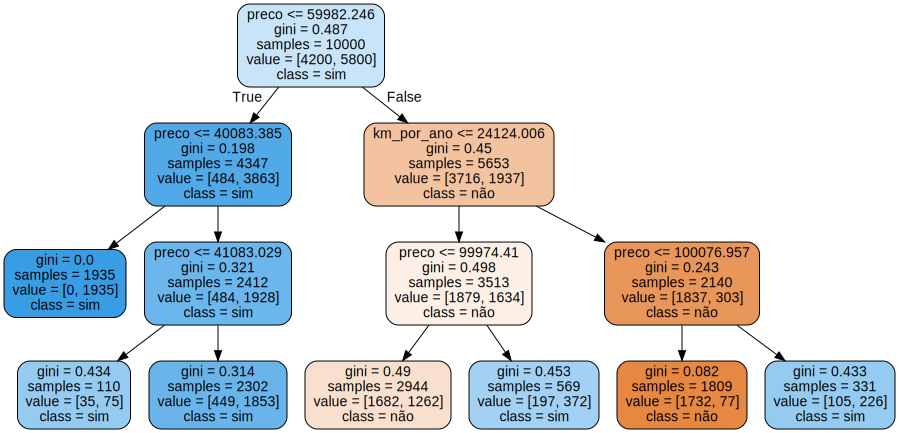

In [29]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

Precisamos melhora o codigo para que ele execute o fit mais de uma vez e assim pode chegar em uma resposta definitiva

In [30]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 77.19
Accuracy intervalo = [74.83, 79.54]


Desse modo, se imprimirmos ou analisarmos por dentro, encontraremos: primeiro uma transformação, que é o Standrscaler(), e depois um estimador que é um SVC().

E vamos rodar esse código. Agora sim, para cada um dos processos de fold, serão rodados tanto a transformacao, quanto o estimador. Depois, outro conjunto de dados será separado em dois, tanto a transformacao, quanto o estimador. Portanto, a execução do código vai demorar um pouco mais. O importante é que teremos uma estimativa mais realista do modelo SVC(), com StandardScaler, no mundo real, considerando agrupamentos

OBS: Reparem que o valor anterior e este não são tão distantes, mas é preciso entender que a forma feita anteriormente estava errada, porque rodávamos o scaler somente uma vez, para depois rodar os KFolds. Não é questão de estar melhor ou pior, pois estamos falando de um processo, que deve ser rodado para cada uma das fases de treino. Portanto, se tivermos 10 fases de treino, teremos que rodar o scaler para cada uma do conjunto de treino. E é isso que o Pipeline faz para nós, de forma muito mais prática. Basta inserir todas as fases nele e rodar. Claro, pode demorar um pouco mais, mas é a opção que faz mais sentido.

Para rodar algorítimos com cross_validate, que exigem pré processamento, vocês talvez queiram fazer o treino desse pré processamento somente na parte de treino. Para isso será necessário incluí-lo em um Pipeline.

Agora queremos visualizar essa árvore. Para isso, utilizaremos o Graphviz 

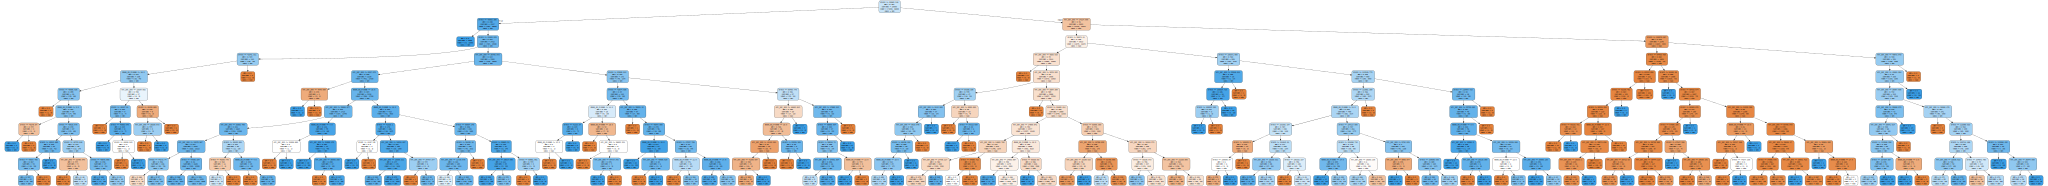

In [31]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                            class_names=["não", "sim"], 
                            feature_names =  features)

graph = graphviz.Source(dot_data)
graph

# Explorando hiper parâmetros em uma dimensão

In [32]:
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, Treino = %.2f, teste = %2.f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela


resultados = [roda_arvore_de_decisao(i) for i in range (1, 33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "test"])
resultados.head()

Arvore max_depth = 1, Treino = 75.79, teste = 76
Arvore max_depth = 2, Treino = 75.79, teste = 76
Arvore max_depth = 3, Treino = 78.76, teste = 79
Arvore max_depth = 4, Treino = 78.79, teste = 79
Arvore max_depth = 5, Treino = 78.89, teste = 79
Arvore max_depth = 6, Treino = 79.16, teste = 78
Arvore max_depth = 7, Treino = 79.49, teste = 78
Arvore max_depth = 8, Treino = 79.88, teste = 78
Arvore max_depth = 9, Treino = 80.35, teste = 78
Arvore max_depth = 10, Treino = 81.03, teste = 77
Arvore max_depth = 11, Treino = 81.80, teste = 77
Arvore max_depth = 12, Treino = 82.68, teste = 76
Arvore max_depth = 13, Treino = 83.69, teste = 76
Arvore max_depth = 14, Treino = 84.72, teste = 76
Arvore max_depth = 15, Treino = 85.71, teste = 75
Arvore max_depth = 16, Treino = 86.78, teste = 75
Arvore max_depth = 17, Treino = 87.85, teste = 75
Arvore max_depth = 18, Treino = 88.96, teste = 74
Arvore max_depth = 19, Treino = 89.94, teste = 74
Arvore max_depth = 20, Treino = 90.88, teste = 74
Arvore ma

,max_depth,train,test
0,1,75.791383,75.800636
1,2,75.791383,75.800636
2,3,78.757964,78.674575
3,4,78.786833,78.644803
4,5,78.891330,78.538318


O que esperaríamos é que, quanto maior fosse a profundidade da árvore, mais decisões ela precisaria tomar e mais perfeito seria o seu treinamento em relação aos nossos testes. Porém, a partir de max_depth=3, que possui uma média 78.67, temos uma queda constante até max_depth = 32, que possui a média mais baixa, 72.52.

Isso acontece porque, quando treinamos a nossa árvore, ela aprende e cria as suas ramificações. Com profundidades muito grandes, a árvore se torna tão perfeita para os dados de treino que falha nos dados de teste - quase como se ela tivesse memorizado o teste.

O código assim analisa todas as 32 camadas da arvore de ligação assim ele analisa seu teste e treino. Observa-se que os treinos de todas as camadas vão aumentando cradativamente com forme as camadas, mas o teste vai diminuido, so que seu apce se encontra nas camas 3 a 5 onde são altas.

Pode se nota fácilmente na tabela a cima

<AxesSubplot:xlabel='max_depth', ylabel='train'>

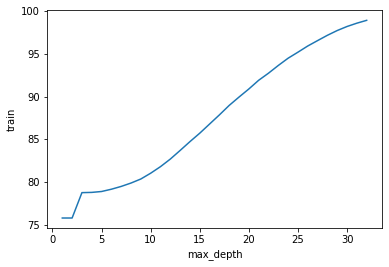

In [33]:
import seaborn as sns

sns.lineplot(x = "max_depth", y = "train", data = resultados)

# OVERFIT: ficou "perfeito" para o treino mas ruim para o teste

Atraves do gráfico da para nota que o Treino aumenta bastante conforme o max_depth, mas o teste diminui, mas ambos chegam no mesmo ponto e depois se separam.


,max_depth,train,test
2,3,78.757964,78.674575
3,4,78.786833,78.644803
4,5,78.891330,78.538318
5,6,79.158097,78.356171
6,7,79.485853,78.041815


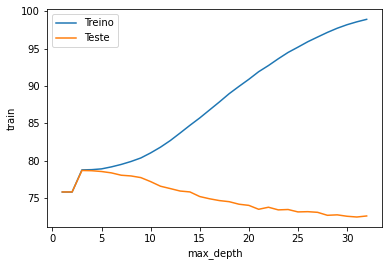

In [34]:
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

resultados.sort_values("test", ascending=False).head()

# Explorando hiper parâmetros em 2 dimensões

In [35]:
#AGORA TEREMOS 2 DIMENSÕES#
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()
resultados.sort_values("test", ascending=False).head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.69
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.69
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.69
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.69
Arvore max_depth = 4, min_samples_leaf = 32, treino = 78.75, teste = 78.69
Arvore max_depth = 

,max_depth,min_samples_leaf,train,test
15,4,256,78.752411,78.694626
8,3,32,78.752411,78.694626
19,5,256,78.752411,78.694626
14,4,128,78.752411,78.694626
13,4,64,78.752411,78.694626


O min_samples_leaf faz com que seja rodado 2 parâmetros assim ele testa o 32, 64, 128 e 256 em orde do 1 ate o 32 1 por 1. Assim fica fácil e rapido a leitura dos nossos dados
OBS: Os melhores resultados foram na camada 4.


In [36]:
resultados.corr()

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.546745,-0.076752
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.401317,0.232541
train,5.467452e-01,-4.013175e-01,1.000000,0.140134
test,-7.675206e-02,2.325410e-01,0.140134,1.000000


Quanto mais alto o valor, mais correlacionados estão os elementos na comparação. Por exemplo, quanto maior o max_depth, maior será o max_depth. Essa é uma conclusão bastante óbvia, afinal o max_depth é ele mesmo, mas que nos ajuda a entender o que está acontecendo. Além disso, repare resultados positivos (maiores que 0) representam uma correlação positiva, e negativos uma correlação negativa.

Outras conclusões que podemos tirar a partir desses resultados:

quando max_depth cresce, o treino parece crescer também

quando min_samples_leaf cresce, o treino cai

quando max_depth sobe, o teste cai

quando min_samples_leaf sobe, o teste sobe

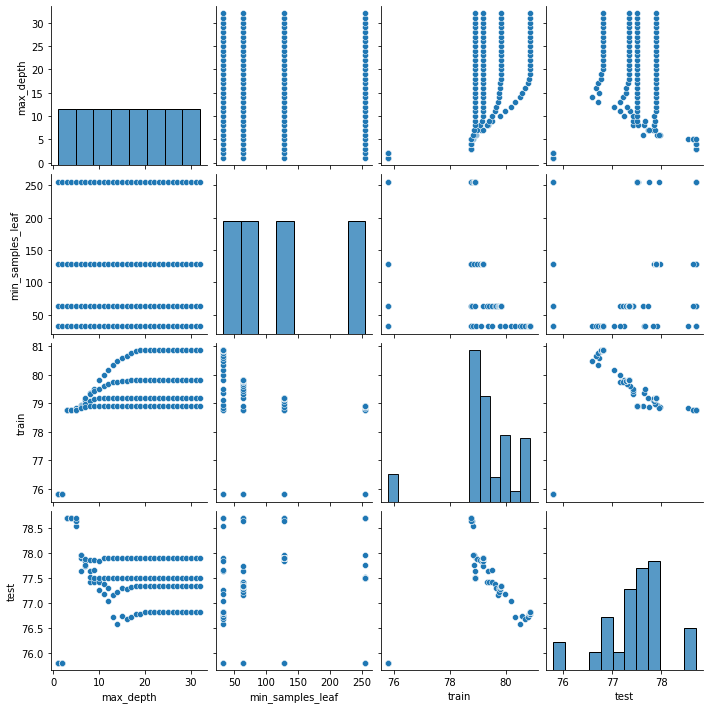

In [37]:
sns.pairplot(resultados)

No gráfico do canto inferior esquerdo, temos 4 linhas que provavelmente representam cada valor de min_samples_leaf. Entretanto, ao menos nesse gráfico, é impossível visualizarmos qual valor cada linha representa.

C:\Users\joaor\AppData\Local\Temp\ipykernel_4652\3622300031.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

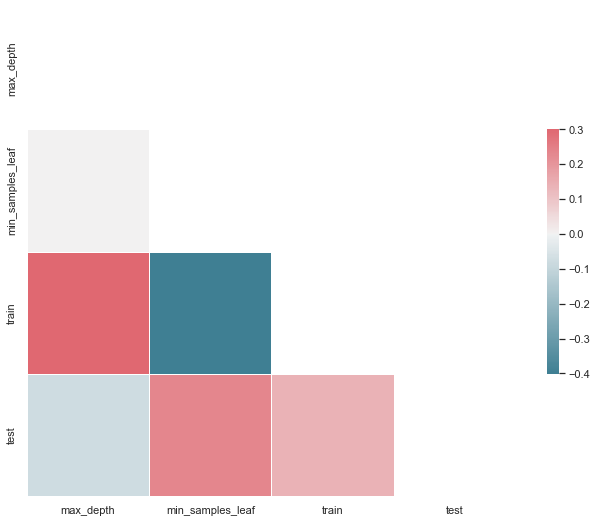

In [38]:
corr = resultados.corr()

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [128, 192, 256, 512]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
    return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.80
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.69
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.69
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.69
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.52, teste = 77.51
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.69
Arvore max_d

,max_depth,min_samples_leaf,train,test
0,1,128,75.791383,75.800636
1,1,192,75.791383,75.800636
2,1,256,75.791383,75.800636
3,1,512,75.791383,75.800636
4,2,128,75.791383,75.800636


C:\Users\joaor\AppData\Local\Temp\ipykernel_4652\3622300031.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

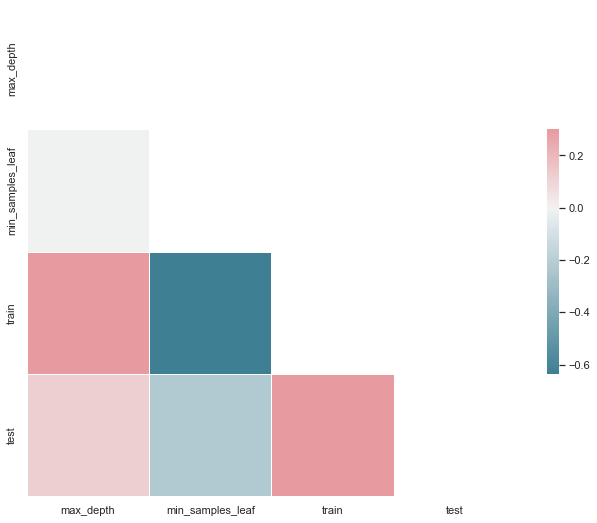

In [40]:
corr = resultados.corr()

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
18,5,256,78.752411,78.694626
14,4,256,78.752411,78.694626
13,4,192,78.752411,78.694626
12,4,128,78.752411,78.694626
8,3,128,78.752411,78.694626


Essa é uma maneira de tentarmos encontrar os valores que mais otimizam o nosso estimador, com o menor índice de erro e o maior nível de qualidade. Fizemos isso com dois parâmetros, mas é possível trabalhar com um número ainda maior!

In [42]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test
0,1,32,32,75.791383,75.800636
1,1,32,64,75.791383,75.800636
2,1,32,128,75.791383,75.800636
3,1,32,256,75.791383,75.800636
4,1,64,32,75.791383,75.800636


Repare que removemos o trecho no qual os resultados eram imprimidos na tela. Isso porque, além de aumentar o tempo de execução do nosso código - que já é 4 vezes maior que quando tínhamos apenas 2 parâmetros -, a lista de resultados não nos trazia nenhuma informação relevante, já que era praticamente ilegível, servindo apenas para acompanharmos o debug.

In [43]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test
58,4,128,128,78.752411,78.694626
40,3,128,32,78.752411,78.694626
57,4,128,64,78.752411,78.694626
56,4,128,32,78.752411,78.694626
55,4,64,256,78.752411,78.694626


C:\Users\joaor\AppData\Local\Temp\ipykernel_4652\2638315470.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

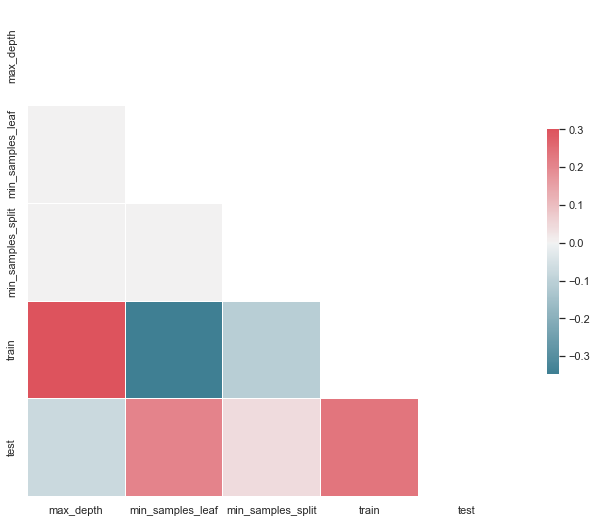

In [44]:
corr = resultados.corr()

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Com base nesse gráfico e na análise dos 5 melhores resultados do teste, poderíamos tomar uma decisão entre continuar explorando esse espaço de parâmetros ou não.

Outro fator que pode ser analisado é o tempo que a máquina virtual leva para treinar o algoritmo. O próprio cross_validate() tem, entre os seus resultados, a cronometragem do tempo. Portanto, basta extrairmos as variáveis referentes ao tempo e imprimirmos na tabela.

# Explorando 3 dimensões de hiper parâmetros

In [45]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results["fit_time"].mean()
  score_time = results["score_time"].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train", "test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791383,75.800636,0.007499,0.001901
1,1,32,64,75.791383,75.800636,0.008399,0.002303
2,1,32,128,75.791383,75.800636,0.006198,0.001501
3,1,32,256,75.791383,75.800636,0.006100,0.001900
4,1,64,32,75.791383,75.800636,0.007100,0.001900


In [46]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
58,4,128,128,78.752411,78.694626,0.014801,0.001701
40,3,128,32,78.752411,78.694626,0.010701,0.002101
57,4,128,64,78.752411,78.694626,0.015101,0.002601
56,4,128,32,78.752411,78.694626,0.014401,0.002100
55,4,64,256,78.752411,78.694626,0.015701,0.002601


C:\Users\joaor\AppData\Local\Temp\ipykernel_4652\3622300031.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

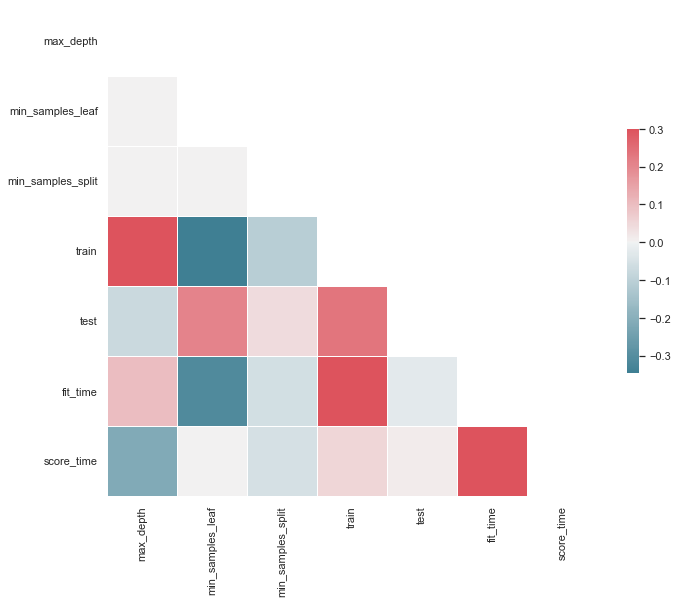

In [47]:
corr = resultados.corr()

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Repare que existe uma pequena diferença entre os tempos de treino e os treinos de teste. Nesse caso, nosso treino é tão rápido que essas diferenças são insignificantes. Porém, se tivéssemos um algoritmo que demora 30 minutos para fazer o treinamento e no qual o tempo de teste fosse muito alto, talvez valesse a pena escolhermos os valores com base nesses resultados.

Além dos 3 parâmetros que analisamos até agora, o DecisionTreeClassifier possui vários outros, a exemplo do critério de análise da árvore (como e/ou quando quebrar). Esse parâmetro pode receber dois diferentes valores, como gini ou entropy.

Os parâmetros de um algoritmo estimador não precisam ser discretos como os que estudados até o momento. Por exemplo, existem casos em que trabalhamos com escala logarítmica ou exponencial, e é mais interessante explorar valores mais altos ou mais baixos. Ou seja, existem vários tipos de espaços de parâmetros que podem ser explorados.

Agora que aprendemos a trabalhar com 3 parâmetros, lembre-se que é possível utilizar 4, 5 ou dezenas de parâmetros diferentes. Na prática, não há como explorar todas as possibilidades, portanto a ideia é explorarmos somente uma seleção dela

GridSearchCV (grid search cross validation), que faz ums busca de hiperparâmetros com validação cruzada. Para funcionar de maneira eficiente, ee deve conter diversas dimensões:

max_depth com os valores 3 e 5

min_samples_split com os valores 32, 64 e 128

min_samples_leaf também com os valores 32, 64 e 128

criterion com os valores gini e entropy (que são strings)

Ou seja, estaremos explorando 4 dimensões diferentes que resultam em 36 combinações.


# Explorando espaço de hiper parâmetros com GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
    
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012299,0.001552,0.002001,0.000448,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1
1,0.011400,0.001019,0.002101,0.000300,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1
2,0.014702,0.002571,0.002200,0.000401,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1
3,0.013601,0.004477,0.001801,0.000601,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1
4,0.016901,0.004254,0.002801,0.000872,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1


Essa tabela nos mostra diversas informações, como a média do tempo de treino, a média do tempo de teste, a acurácia do teste e do treino e o ranking delas, quais foram cada um dos parâmetros utilizados, entre outras.

In [49]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.69462611699876


In [50]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [51]:
from sklearn.metrics import accuracy_score 

predicoes = melhor.predict(x_azar) 
accuracy = accuracy_score(predicoes, y_azar) * 100

print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


# Como ter uma estimativa sem esse vício nos dados que eu já vi?
# No caso de cross validation com busca de hiper parâmetros, fazemos uma nova validação cruzada. Chama-se nested cross validation

In [52]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups= dados.modelo)

c:\Users\joaor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\joaor\AppData\Local\Programs\Python\Python310\lib\site-p

Tentando rodar esse código, receberemos um erro afirmando que o valor de groups não deve ser none, como se não tivéssemos passado nenhum valor para os grupos. Ou seja, de alguma forma groups não está chegando em GroupKFold() - e é exatamente isso que está acontecendo.

Na verdade, isso ocorre por conta de um bug - o GroupKFold falha na validação cruzada aninhada, e existe até um tópico no GitHub do scikit sobre esse problema. É um bug antigo (o tópico foi criado em 2016), mas continua em aberto, pois é razoavelmente complicado implementar a correção dele. Como alternativa, usaremos o KFold comum.

# Infelizmente como o Pandas não suporta nested validation com group k fold não conseguimos prever o resultado para novos grupos

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)
espaço_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010000,0.001098,0.002200,4.012915e-04,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.791,0.793,0.7735,0.796,0.7867,0.00853,1
1,0.009615,0.000473,0.002000,2.431402e-07,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.791,0.793,0.7735,0.796,0.7867,0.00853,1
2,0.011404,0.001492,0.001801,7.489150e-04,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.791,0.793,0.7735,0.796,0.7867,0.00853,1
3,0.017201,0.004708,0.003201,1.165864e-03,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.791,0.793,0.7735,0.796,0.7867,0.00853,1
4,0.019401,0.003200,0.003801,7.484941e-04,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.791,0.793,0.7735,0.796,0.7867,0.00853,1


In [54]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
score

array([0.7725, 0.798 , 0.797 , 0.787 , 0.781 ])

Nossos resultados serão esses cinco valores


In [55]:
def imprime_score(score):
   media = score.mean() * 100
   desvio = score.std() * 100
   print("Accuracy médio %2.f" % media)
   print("Intervalo [%2.f, %2.f]" % (media - 2 * desvio, media + 2 * desvio))

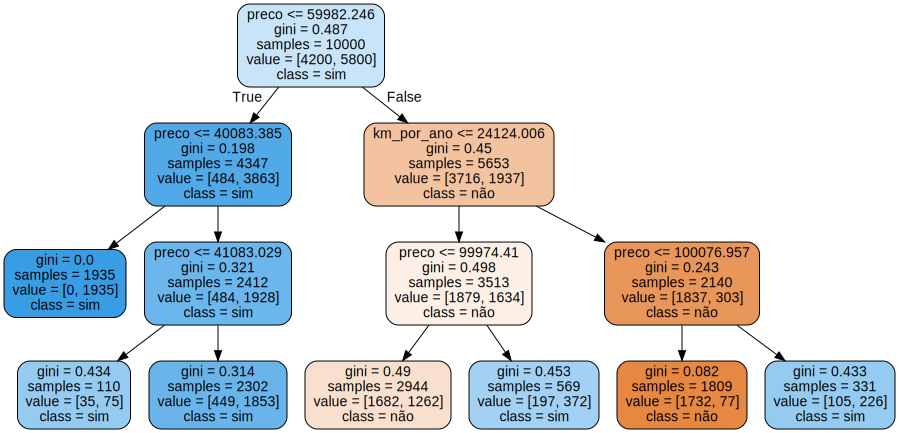

In [56]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                           class_names=["não", "sim"],
                           feature_names=features)

graph = graphviz.Source(dot_data)
graph

Repare que a árvore tem 3 níveis de profundidade (max_depth=3, ou seja, três decisões a serem tomadas), e as folhas e os splits (min_samples_leaf e min_samples_split, respectivamente) têm um mínimo de 32 samples cada. Além disso, as decisões de quebras seguem o critério de gini ao invés de entropy.

Esse é o melhor modelo real que iremos utilizar agora que exploramos o espaço de hiperparâmetros. Esse tipo de exploração com grid, no qual cada espaço é analisado separadamente, é válido e funciona. Porém, é um processo demorado, e existem otimizações que podem ser feitas para contornar isso.

# BUSCA ALEATÓRIA: RandomSearch


In [57]:
from sklearn.model_selection import RandomizedSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, 
                    n_iter = 16,
                    cv = KFold(n_splits = 5),
                          random_state = SEED)


busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011999,0.000632,0.002003,2.032020e-06,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.78,0.7905,0.792,0.775,0.788,0.7851,0.006530,12
1,0.009401,0.001497,0.002800,1.720535e-03,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1
2,0.008800,0.000399,0.002201,4.008592e-04,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1
3,0.015600,0.000800,0.002001,9.344062e-07,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1
4,0.019001,0.002097,0.002401,4.906221e-04,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1


Após a execução desse código, queremos saber quão bem se saiu o melhor classificador.

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)

Accuracy médio 79
Intervalo [77, 80]


Em seguida, para encontrarmos o melhor estimador, atribuiremos a função busca.best_estimator_ à uma variável melhor e imprimiremos essa variável na tela.

In [59]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)


Isso significa que o melhor estimador teve o critério gini, a profundidade máxima 5, o mínimo de elementos na folha 128 e, e 128 como o mínimo de splits antes de tomar uma decisão. Tivemos uma acurácia média de 78.69%, em um intervalo entre 76.70% e 80.68%.

Repare que executando menos da metade das buscas, obtivemos uma acurácia média e um intervalo muito parecidos com aqueles do GridSearchCV (que tinha a média 78.68% e o intervalo 76.85% a 80.55).

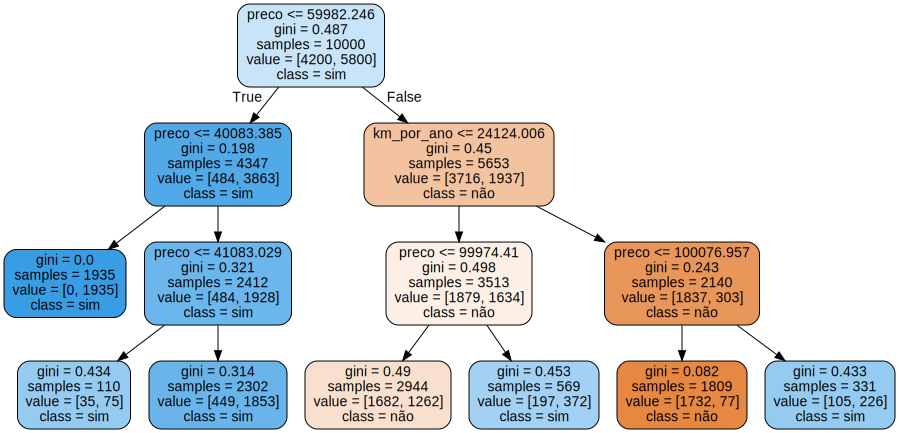

In [60]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                        class_names=["não", "sim"],
                        feature_names = features)

graph = graphviz.Source(dot_data)
graph

Na prática, a utilização do RandomizedSearchCV nos permite encontrar valores muito próximos aos que mais otimizarão nossos estimadores, sem que seja necessário explorar todo o espaço de parâmetros (o que muitas vezes é impossível).

# Customizando o espaço de hiper parâmetros

In [61]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32, 128),
    "min_samples_leaf": randint(32, 128),
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, 
                    n_iter = 16,
                    cv = KFold(n_splits = 5, shuffle=True),
                          random_state = SEED)


busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013001,0.001097,0.001800,0.000400,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7800,0.7910,0.7930,0.7735,0.7960,0.7867,0.008530,1
1,0.021001,0.003633,0.002600,0.000490,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7725,0.7880,0.7845,0.7670,0.7845,0.7793,0.008091,9
2,0.027602,0.006652,0.003001,0.001097,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7710,0.7880,0.7950,0.7695,0.7755,0.7798,0.010003,6
3,0.028002,0.009530,0.003201,0.001470,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7700,0.7765,0.7785,0.7615,0.7805,0.7734,0.006917,16
4,0.022401,0.002728,0.002601,0.000801,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7710,0.7880,0.7890,0.7695,0.7755,0.7786,0.008327,11


In [62]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 79
Intervalo [78, 80]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


Nossa acurácia foi bem próxima dos resultados anteriores, mas o ponto é que demoramos um tempo 8.000 vezes menor para explorar esse espaço de parâmetros, obtendo resultados tão bons quanto conseguiríamos com o GridSearchCV.

Queremos ordenar os resultados da nossa busca pelo score médio (mean_test_score). Para isso, usaremos o sort_values, passando o nome dessa coluna e o argumento ascending=False (negando a ordenação crescente da função). Nesse momento, não estamos levando em consideração o intervalo de confiança (com duas vezes o desvio padrão).

In [77]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
#Com a função iterrows, iremos iterar por cada uma das linhas dessa tabela do pandas. O iterrows é um gerador de iteração que devolve dois elementos em cada uma das linhas: 
# o índice e a linha. Começaremos imprimindo os índices:
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print("%.3f +- (%3.f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))


0.778 +- (  0) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.776 +- (  0) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +- (  0) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +- (  0) {'n_estimators': 100, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +- (  0) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +- (  0) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.775 +- (  0) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'boo

Essa é uma forma resumida de imprimir os resultados que recebíamos na tabela do pandas. Com 16 combinações, é uma análise razoável. Mas e se quiséssemos explorar um número maior - por exemplo, 64? Imprimindo os resultados dessa exploração na tela, encontraremos os mesmos RandomizedSearchCV irá explorar os parâmetros da mesma maneira

Porém, essa exploração é aleatória, e não é uma prática comum mudarmos o SEED para encontrar valores ótimos - já que, como podemos perceber, os valores são bastante próximos entre si. Na verdade, esses resultados também poderiam ser muito distantes entre si, dependendo de várias condições.

Para encerrar, faremos a validação cruzada aninhada e imprimiremos o melhor conjunto de parâmetros encontrado para esse estimador:

In [64]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 79
Intervalo [77, 81]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


Esse é o resultado do nosso treino com uma busca aleatória contendo 64 tentativas. Repare que ainda conseguimos executar o código rapidamente, e com um computador mais potente conseguiríamos rodar ainda mais valores para o nosso estimador.

Mas será que o RandomizedSearchCV é mesmo melhor que o GridSearchCV?

 DISCUTIR NO FORUM
PRÓXIMA ATIVIDA

# Comparando GridSearchCV com RandomizedSearch (1comparação)

Além disso, se o grid tiver valores infinitos entre 0 e 1, será impossível explorar todo esse espaço, sendo necessário pegar exemplares aleatórios ou discretizar a seleção de alguma forma.

OBS: "Até o momento, vínhamos utilizando o DecisionTreeClassifier, um dos diversos classificadores baseados em árvores de decisão. Existem outros classificadores que, ao invés de tentarem uma única árvore, tentam diversas árvores. Um desses, bem famoso, é o ensemble RandomForestClassifier.

O sklearn ensemble RandomForestClassifier é um conjunto de classificadores que atuam de forma uníssona para chegar a uma conclusão. Além de possuir os diversos hiperparâmetros que já conhecemos antes, esse classificador possui alguns novos, como max_features (o número máximo de colunas de X utilizado para chegar a uma decisão)"

In [65]:
from sklearn.ensemble import RandomForestClassifier
import time 

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 312.60 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055204,0.006853,0.006601,0.002059,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7710,0.7730,0.7400,0.7620,0.7170,0.7526,0.021304,142
1,0.692975,0.075191,0.049405,0.007967,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7820,0.7800,0.7610,0.7785,0.7746,0.007664,41
2,0.085204,0.002925,0.008802,0.001470,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7710,0.7830,0.7690,0.7585,0.7795,0.7722,0.008594,82
3,0.715454,0.048215,0.046204,0.005037,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7635,0.7810,0.7805,0.7615,0.7790,0.7731,0.008703,72
4,0.068805,0.007025,0.007200,0.000981,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7765,0.7340,0.7425,0.7230,0.7495,0.020998,144


In [76]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.778 +-(0.020) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.776 +-(0.019) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.017) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.016) {'n_estimators': 100, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +-(0.016) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}


In [67]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tic - tac
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo -1101.38 segundos
Accuracy médio 77
Intervalo [73, 81]
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=64,
                       min_samples_split=64, n_estimators=10)


Esse processo irá demorar tanto que o próprio Google Colab encerrará a conexão com a máquina virtual do Python. Ou seja, seria necessário rodarmos o código na nossa própria máquina para que a execução chegasse ao seu fim.

In [70]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 20,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 26.96 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.387244,0.013506,0.022002,0.001415,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7720,0.7895,0.7770,0.7665,0.7560,0.7722,0.011111,10
1,0.055604,0.011740,0.004201,0.000400,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7580,0.7895,0.7690,0.7655,0.7550,0.7674,0.012138,16
2,0.505658,0.009539,0.025802,0.001470,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7720,0.7935,0.7775,0.7660,0.7720,0.7762,0.009384,2
3,0.033802,0.001721,0.004201,0.000980,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7650,0.7725,0.7415,0.7405,0.7505,0.7540,0.012759,20
4,0.050004,0.001550,0.004800,0.000979,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7775,0.7875,0.7570,0.7425,0.7705,0.7670,0.015767,17


In [75]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.778 +-(0.020) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.776 +-(0.019) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.017) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.016) {'n_estimators': 100, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +-(0.016) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}


Quando exploramos as 144 combinações do nosso grid, tínhamos chegado à média 0.780 com +- 0.020 de desvio padrão - ou seja, valores muito próximos dos que encontramos com o RandomSearchCV. Lembrando que esses valores são relativamente próximos - ou seja, essa interpretação depende muito da situação em que nosso algorítimo é aplicado. Em casos de vida ou morte, por exemplo, uma diferença de 0.004 pode ser significante.

In [78]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 127.96 segundos
Accuracy médio 78
Intervalo [76, 79]
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=3,
                       min_samples_leaf=64, min_samples_split=32,
                       n_estimators=10)


Em cerca de 2 minutos e meio obtivemos os resultados do cross_validation_score() com o RandomizedSearchCV. Enquanto isso, somente com 144 possibilidades, não conseguimos rodar a mesma função com do GridSearchCV remotamente.

In [85]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 80,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 99.83 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.339522,0.030501,0.020202,0.001469,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7695,0.7985,0.7635,0.7670,0.7630,0.7723,0.013314,65
1,0.256021,0.004979,0.018600,0.000802,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7690,0.8005,0.7795,0.7670,0.7625,0.7757,0.013596,14
2,0.248818,0.007782,0.018801,0.000400,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7625,0.7965,0.7790,0.7670,0.7630,0.7736,0.012905,55
3,0.163105,0.004171,0.012825,0.000986,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7925,0.7530,0.7665,0.7630,0.7687,0.013041,74
4,0.267104,0.021147,0.017076,0.000832,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7980,0.7785,0.7665,0.7630,0.7749,0.012647,33


In [81]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.776 +-(0.015) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 163, 'min_samples_split': 161, 'n_estimators': 47}
0.776 +-(0.018) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 165, 'min_samples_split': 191, 'n_estimators': 11}
0.775 +-(0.018) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 189, 'min_samples_split': 180, 'n_estimators': 32}
0.775 +-(0.019) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 173, 'min_samples_split': 178, 'n_estimators': 78}
0.775 +-(0.019) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 182, 'min_samples_split': 173, 'n_estimators': 71}


O melhor resultado que encontramos foi 0.79 de média com +- 0.025 de desvio padrão, muito próximo dos anteriores. Lembrando que, com o GridSearchCV, levamos cerca de 4 minutos e meio para chegar aos resultados explorando um espaço muito menor.

Dependendo do algorítimo e dos dados, pode ser que a escolha de um hiperparâmetro faça uma diferença muito grande no sistema como um todo. Como exemplo, você pode consultar o artigo Hyperparameters Matter, que analisa a importância dos hiperparâmetros no contexto de recomendações com Word2vec.

# Se eu não posso ou Não consigo usar o cross validation

Agora que fizemos algumas comparações entre o GridSearchCV e o RandomizedSearchCV, vamos analisar alguns casos diferentes.

Por exemplo, pode ser que não seja possível, computacionalmente, rodar um cross validation, independentemente do fold. Nesse caso, como faríamos uma otimização de hiperparâmetros sem cross validation? Teríamos que, mesmo assim, tentar separar os dados entre treino e teste.

Até o momento, estávamos trabalhando com duas fases: a fase de treino e teste, e a fase de validação com cross_val_score() (nested cross validation). Na prática, agora teremos três fases: uma fase de treino do modelo (ou de vários modelos) na busca de otimizar os hiperparâmetros; uma fase de teste, comparando os modelos para encontrar os melhores resultados; e uma fase de validação, tentando alcançar uma estimativa real desse algorítimo.

No sklearn.model_selection, precisaremos encontrar um algorítimo de separação que não seja um KFold (que só separa uma única vez, sem validação cruzada). Existem algorítimos que fazem isso, como o ShuffleSplit, que irá aleatorizar os dados e quebrá-los uma única vez; ou o StratifiedShuffleSplit, que irá aleatorizar a ordem dos dados e quebrá-los de acordo com a estratificação dos dados que passarmos para ele. É esse algorítimo que utilizaremos agora, independentemente de trabalharmos com o GridSearchCV ou com o RandomizedSearchCV.

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit



SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5,
                    cv = split)
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 2.15 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.429119,0.0,0.059005,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7805,0.7805,0.0,1
1,0.435990,0.0,0.018999,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7795,0.7795,0.0,3
2,0.309022,0.0,0.018003,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7755,0.0,5
3,0.170014,0.0,0.012999,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7795,0.7795,0.0,3
4,0.260018,0.0,0.018002,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7805,0.7805,0.0,1


In [95]:
from sklearn.model_selection import train_test_split

SEED=301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)

print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


8.000 elementos e 3 colunas para treino do algorítimo

2.000 elementos para teste

1 coluna para verificar as features e a classe do algorítimo

In [96]:
espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5,
                    cv = split)
busca.fit(x_treino_teste, y_treino_teste)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 1.06 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101007,0.0,0.010003,0.0,True,gini,5,89,58,24,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7820,0.7820,0.0,2
1,0.129006,0.0,0.013001,0.0,False,entropy,3,71,55,27,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7800,0.7800,0.0,3
2,0.092004,0.0,0.007000,0.0,True,entropy,3,33,99,21,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7840,0.7840,0.0,1
3,0.216017,0.0,0.018003,0.0,True,gini,3,98,100,67,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7795,0.7795,0.0,4
4,0.333237,0.0,0.018001,0.0,False,entropy,4,88,64,63,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7795,0.7795,0.0,4


In [97]:
tac = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv=split)
tac = time.time()
tempo_passou = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

scores

Tempo 127.96 segundos


array([0.804])

O resultado é um único 0.080 - como só tivemos um teste e uma validação, removemos a impressão da média e do intervalo.

O cross validation é um processo bastante interessante e prático, e inclusive poderíamos criar um pipeline que o fizesse de uma só vez. Porém, quando existem motivos para não utilizarmos o cross validation, devemos nos atentar a alguns detalhes importantes - por exemplo, à perda do intervalo de resultados.

Existem alternativas para fazer a separação dos dados em três grupos, como utilizar o Numpy ou fazer a estratificação manualmente. Na prática, preferimos utilizar o train_test_split() do próprio SKLearn para separar os dados de validação.

Nós ainda poderíamos rodar o algorítimo StratifiedShuffleSplit() mais de uma vez (n_splits=5, por exemplo), obtendo resultados mais parecidos com um processo de cross validation - inclusive com diversos scores para analisarmos. Porém, as proporções podem ser diferentes, o que exigiria alguns cuidados.